In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("./rgb2gray/1.jpg")
rows, cols, ch = img.shape

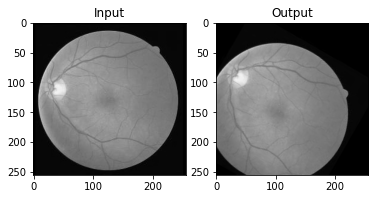

In [17]:
########旋转theta度（默认为顺时针）#########

# 定义旋转角theta
theta = np.pi/6
sin_theta = np.sin(theta)
cos_theta = np.cos(theta)

# pts1为初始变换的坐标，pts2为相应点变换后的坐标
# 注意：pts1与pts2变量交换即可完成逆时针的旋转
# 以任意点（point_x, point_y）以theta角旋转
point_x = rows/3.4
point_y = cols/2.6
pts1 = np.float32([[point_x, point_y],
                   [point_x+0.992, point_y],  # 这里point_x+1为等大小旋转，可以选取1附近的值为图像增加压缩的随机性
                   [point_x, point_y+1.005]]) # 这里也是一样, 如果为了直观，可以将此处的噪音加到pts2上
pts2 = np.float32([[point_x, point_y],
                   [point_x+cos_theta, point_y+sin_theta],
                   [point_x-sin_theta, point_y+cos_theta]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')
  
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')
  
plt.show()

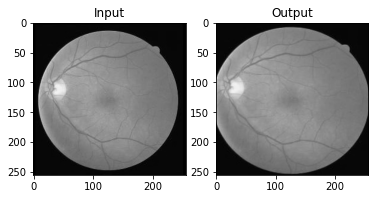

In [38]:
########拉伸压缩图像#########

# 定义压缩倍率
a_x = 1.12
a_y = 1.05
#a_x = 1.52  # 当同时设置为一个较大值时可以完成随机裁剪的任务
#a_y = 1.51

point_x = rows/2
point_y = cols/2

pts1 = np.float32([[point_x, point_y],
                   [point_x+1, point_y], 
                   [point_x, point_y+1]])
pts2 = np.float32([[point_x, point_y],
                   [point_x+a_x, point_y+0.02], #噪音可以加在此处
                   [point_x-0.02, point_y+a_y]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')
  
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')
  
plt.show()